In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
t = np.arange(0,45)

In [3]:
# create signal
sig = -3*np.ones((6,45))
for rownum, start in enumerate([15,12,16,2,14,100]):
    sig[rownum,start:] = 0

In [4]:
# create measurement
meas = np.ones((6,45))
data2 = {'well':[], 'cycle': [], 'fluorescence': []}
data = {}
for row in range(6):
    value = sig[row,0]
    for col in range(45):
        diff = sig[row,col] - value
        value += 0.4*diff
        meas[row,col] = value
        data2['well'].append('well {}'.format(row+1))
        data2['cycle'].append(col)
        data2['fluorescence'].append(value)
    data[f'well {row}'] = meas[row]
data[f'cycle'] = t
df = pd.DataFrame(data2)

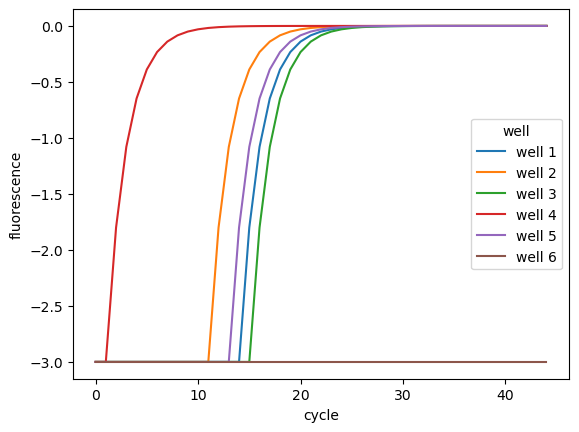

In [5]:
sns.lineplot(data=df, x="cycle", y="fluorescence", hue="well");
plt.savefig("pcr_results.png")

In [9]:
df.to_csv('pcr_sample_1.csv', index=False)